

<h1><font color = Orange><font size = 50 > Project: tmdb-movies</h1>

## Table of Contents
<font color = Orange>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### There's two questions we ant to answer :<br>
#### 1- is budget related to higher revenues ?
#### 2- is popularity of movies  related to higher revenues ?




In [188]:
#importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [189]:
movies_df = pd.read_csv("tmdb-movies.csv") #import the dataset 
movies_df.head() #check the first five enteries of the dataset 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [190]:
movies_df.shape # get the shape of the dataset

(10866, 21)

In [191]:
for i,col in enumerate(movies_df):                       #get each of the dataset columns allog with its type 
    print(i+1,"-",col , type(movies_df[col][0]))

1 - id <class 'numpy.int64'>
2 - imdb_id <class 'str'>
3 - popularity <class 'numpy.float64'>
4 - budget <class 'numpy.int64'>
5 - revenue <class 'numpy.int64'>
6 - original_title <class 'str'>
7 - cast <class 'str'>
8 - homepage <class 'str'>
9 - director <class 'str'>
10 - tagline <class 'str'>
11 - keywords <class 'str'>
12 - overview <class 'str'>
13 - runtime <class 'numpy.int64'>
14 - genres <class 'str'>
15 - production_companies <class 'str'>
16 - release_date <class 'str'>
17 - vote_count <class 'numpy.int64'>
18 - vote_average <class 'numpy.float64'>
19 - release_year <class 'numpy.int64'>
20 - budget_adj <class 'numpy.float64'>
21 - revenue_adj <class 'numpy.float64'>


In [192]:
movies_df.info() #check for Nan/null values along the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<h2>Looks like we have some of our data having missing values , most interesting is <font color = Green>  tagline , keywords and homepage <font color = black >cloumns as they have higher loss rates than other columns so , let's take a look of what does that columns represent and if they have significant effect on our anlysis</h2>

In [193]:
movies_df["keywords"]

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
5        father-son relationship|rape|based on novel|mo...
6        saving the world|artificial intelligence|cybor...
7              based on novel|mars|nasa|isolation|botanist
8        assistant|aftercreditsstinger|duringcreditssti...
9             dream|cartoon|imaginary friend|animation|kid
10       spy|based on novel|secret agent|sequel|james bond
11       jupiter|space|woman director|3d|interspecies r...
12       dancing|artificial intelligence|helicopter|dis...
13                  video game|nerd|alien attack|3d|pixels
14              marvel comic|comic|sequel|superhero|vision
15       bounty hunter|wyoming|mountains|hangman|voice ...
16               revenge|murder|on the run|fugitive|fram

In [194]:
movies_df["homepage"]

0                            http://www.jurassicworld.com/
1                              http://www.madmaxmovie.com/
2           http://www.thedivergentseries.movie/#insurgent
3        http://www.starwars.com/films/star-wars-episod...
4                                 http://www.furious7.com/
5             http://www.foxmovies.com/movies/the-revenant
6                          http://www.terminatormovie.com/
7              http://www.foxmovies.com/movies/the-martian
8                             http://www.minionsmovie.com/
9                      http://movies.disney.com/inside-out
10             http://www.sonypictures.com/movies/spectre/
11                         http://www.jupiterascending.com
12                             http://exmachina-movie.com/
13                            http://www.pixels-movie.com/
14       http://marvel.com/movies/movie/193/avengers_ag...
15                             http://thehatefuleight.com/
16                             http://www.taken3movie.co

In [195]:
movies_df["tagline"]

0                                        The park is open.
1                                       What a Lovely Day.
2                               One Choice Can Destroy You
3                            Every generation has a story.
4                                      Vengeance Hits Home
5          (n. One who has returned, as if from the dead.)
6                                         Reset the future
7                                           Bring Him Home
8             Before Gru, they had a history of bad bosses
9                 Meet the little voices inside your head.
10                                   A Plan No One Escapes
11                                   Expand your universe.
12       There is nothing more human than the will to s...
13                                                Game On.
14                                     A New Age Has Come.
15        No one comes up here without a damn good reason.
16                                            It Ends He

<h3>------------------------------------------------------------------------------------------------------<br>
    1- Looks like we can drop homepage column as it should have no postive or negative effect on any of the analysis we are going to make.<br>
    <br>
    2- Also by looking at tagline columns we could see that it should carry no  useful info for our analysis<br>
    <br>
    3- Keywords columns could be useful to recognize diiferent genres and ideas and thier corresponding revenues however the loss in data is big and it's not very useful to us and we can't fill it for example by mean or others because it won't be really descriptive any more so we can also drop it 
</h3>


let's see if correlation can help us identify the most important column/features we need for our analysis

In [196]:
movies_df.corr() #get correlation among different columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


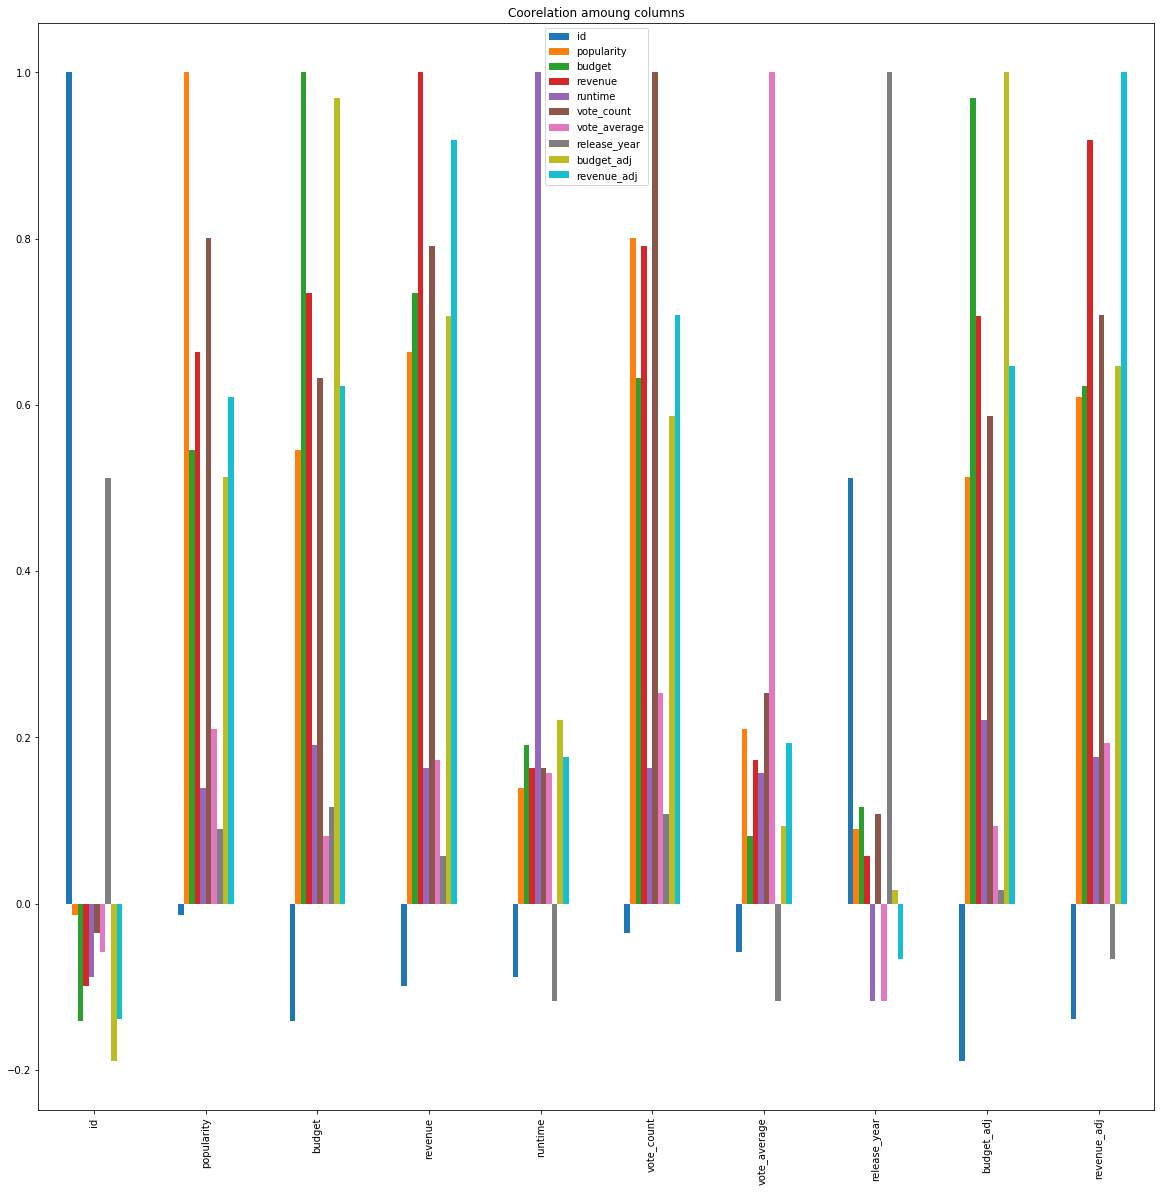

In [197]:
movies_df.corr().plot(kind = "bar",figsize =(20,20),title = "Coorelation amoung columns"); #plot correlation
Corr.set_ylabel("Correlation");
Corr.set_xlabel("Dataset columns");

From the above plot that shows each of the columns and thier correlation with each other , we can identify that some columns 
are lesss useful and have low correlation rates like (release_year) 

In [198]:
movies_df.corr().loc["release_year"] # get correlatio between release_year and other columns

id              0.511364
popularity      0.089801
budget          0.115931
revenue         0.057048
runtime        -0.117204
vote_count      0.107948
vote_average   -0.117632
release_year    1.000000
budget_adj      0.016793
revenue_adj    -0.066256
Name: release_year, dtype: float64

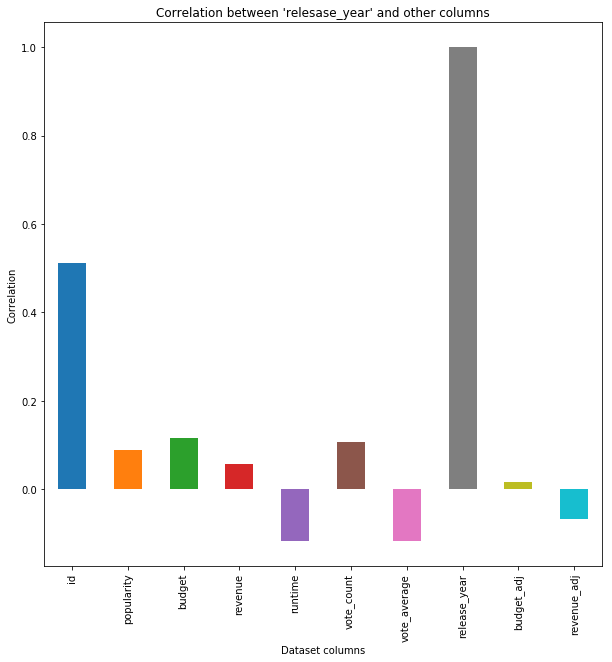

In [199]:
Corr = movies_df.corr().loc["release_year"].plot(kind = "bar" , figsize =(10,10) ,
                                          title = "Correlation between 'relesase_year' and other columns");
Corr.set_ylabel("Correlation");
Corr.set_xlabel("Dataset columns");
# plot correlatio between release_year and other columns

from the plot above that show the correlation between the "release_year" and other columns we can clearly see that "release year"
is not very useful to us and have very low correlation rates with others

<h3> **From the above operations we can say thar release_year column has no significant effect on our analysis as it have very low correlation amoung other features so we can drop it**  </h3>

Let's see if we can do the same for 'id' column 

In [200]:
movies_df.corr().loc["id"] # get correlatio between id and other columns

id              1.000000
popularity     -0.014350
budget         -0.141351
revenue        -0.099227
runtime        -0.088360
vote_count     -0.035551
vote_average   -0.058363
release_year    0.511364
budget_adj     -0.189015
revenue_adj    -0.138477
Name: id, dtype: float64

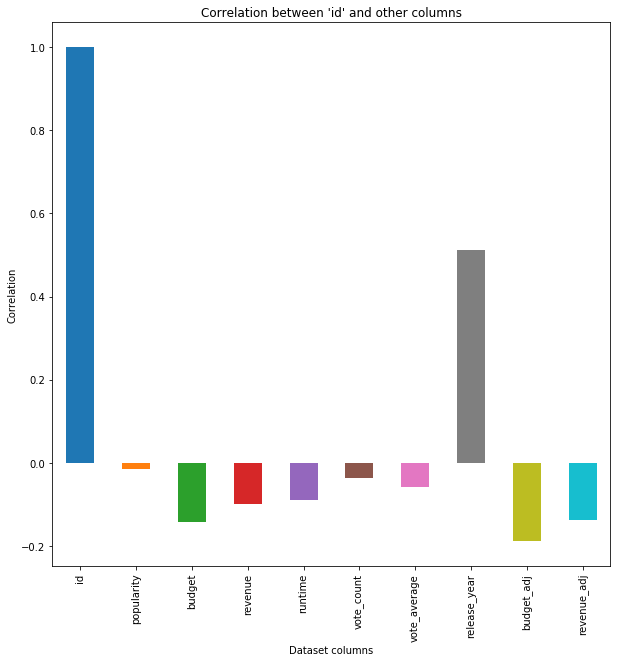

In [201]:
Corr_2 = movies_df.corr().loc["id"].plot(kind = "bar" , figsize =(10,10) ,
                                          title = "Correlation between 'id' and other columns");
Corr_2.set_ylabel("Correlation");
Corr_2.set_xlabel("Dataset columns");

# plot correlatio between id and other columns

From the above plot that shows the correlation between "id" column and other columns , we could see that it have very low correlation rates and we can drop it with no huge loss in data

### **From the above operations we can say thar id column has no significant effect on our analysis as it have very low correlation amoung other features so we can drop it** 



### Data Cleaning (drop dataset columns that are not effective in our analysis which we defined in previous step)

In [202]:
#drop columns process
movies_df.drop(["id","release_year","tagline" , "homepage" , "keywords"],axis = 1 , inplace = True)

In [203]:
movies_df.head() # get first 5 enteries in dataset

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


In [204]:
movies_df.duplicated().sum() #get the number of duplicated data

1

In [205]:
movies_df = movies_df.drop_duplicates() #drop duplicates

In [206]:
movies_df.duplicated().sum() #check for dupliacted data again to verify that they are droped 

0

In [207]:
movies_df.info() #Check for null/Nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 1.4+ MB


In [208]:
movies_df[movies_df.production_companies.isna()]["revenue"].max() 
# get the maximum revenue with nan production company

76000000

In [209]:
movies_df[movies_df.production_companies.isna()]["revenue"]

228             0
259             0
295             0
298             0
328             0
370       2334228
374             0
382             0
388             0
393             0
401             0
404             0
410             0
414             0
415             0
424             0
434        161820
435             0
437             0
440             0
443         30400
450             0
452             0
471             0
473             0
483             0
490             0
503             0
507             0
511             0
           ...   
10108           0
10129           0
10187           0
10339           0
10361     2967668
10374           0
10390           0
10397           0
10428           0
10437           0
10520           0
10521     4711220
10538           0
10560           0
10571           0
10575           0
10581           0
10586           0
10587           0
10590           0
10592           0
10723           0
10741           0
10754           0
10787    1

In [210]:
movies_df.revenue.max()
# get the maximum revenue

2781505847

### Seems like enteries/rows with nan production company is not very useful to us and we can drop nan rows without lossing much data

In [211]:
movies_df.dropna(inplace= True) # drop nan rows 

In [212]:
movies_df.info() # check for nan/null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 16 columns):
imdb_id                 9770 non-null object
popularity              9770 non-null float64
budget                  9770 non-null int64
revenue                 9770 non-null int64
original_title          9770 non-null object
cast                    9770 non-null object
director                9770 non-null object
overview                9770 non-null object
runtime                 9770 non-null int64
genres                  9770 non-null object
production_companies    9770 non-null object
release_date            9770 non-null object
vote_count              9770 non-null int64
vote_average            9770 non-null float64
budget_adj              9770 non-null float64
revenue_adj             9770 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 1.3+ MB


In [213]:
movies_df.head() # get first enteries of our data

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Does popularity affect revenues !

Getting correlation might help us to define if there's a relationship between them 

In [214]:
movies_df.popularity.corr(movies_df.revenue)
# get the correlation between popularity and revenues

0.66240160495203215

looks like we have high correlation , let's have some more visulaizations to ensure that relationship 

In [215]:
print(movies_df[movies_df["revenue"] > movies_df.revenue.mean()]["popularity"].max()) #get max popularity if revenue is above avg
print (movies_df[movies_df["revenue"] < movies_df.revenue.mean()]["popularity"].max())#get max popularity if revenue is below avg

32.985763
7.192039


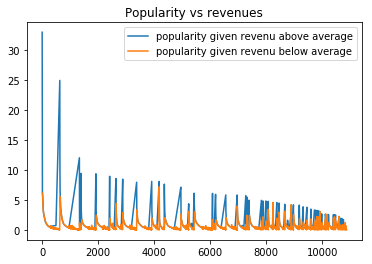

In [216]:
movies_df[movies_df["revenue"] > movies_df.revenue.mean()]["popularity"].plot(label= "popularity given revenu above average")
#plot popularity if revenue is above avg
movies_df[movies_df["revenue"] < movies_df.revenue.mean()]["popularity"].plot(label= "popularity given revenu below average")
#get popularity if revenue is below avg
plt.legend() # enable legend
plt.title("Popularity vs revenues") ; # set title for plot

The plot above shows us that the popullarity of high revenu movies is higher than that of low revenu ones which proves more that population is an indicator to higher revenues

#### From all above given high popularity will result in higher revenues 

### Research Question 2  :Does budget affect revenues !

In [217]:
movies_df.budget.corr(movies_df.revenue)
# get the correlation between budget and revenues

0.73119506622588326


looks like we have high correlation , let's have some more visulaizations to ensure that relationship 

In [218]:
print(movies_df[movies_df["revenue"] > movies_df.revenue.mean()]["budget"].max())#get max budget if revenue is above avg
print (movies_df[movies_df["revenue"] < movies_df.revenue.mean()]["budget"].max())#get max budget if revenue is above avg

380000000
425000000


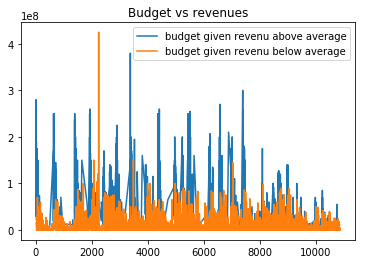

In [219]:
movies_df[movies_df["revenue"] > movies_df.revenue.mean()]["budget"].plot(label= "budget given revenu above average")
#plot budget if revenue is above avg
movies_df[movies_df["revenue"] < movies_df.revenue.mean()]["budget"].plot(label= "budget given revenu below average")
#plot budget if revenue is above avg
plt.legend() # enable legends
plt.title("Budget vs revenues") ; # set title for plot


The above plot shows that higher budget movie 'with budget above average' is most likely to have higher revenu rates than that of lower budget ones

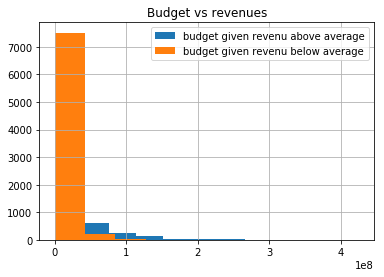

In [220]:
movies_df[movies_df["revenue"] > movies_df.revenue.mean()]["budget"].hist(label= "budget given revenu above average")
#plot budget if revenue is above avg
movies_df[movies_df["revenue"] < movies_df.revenue.mean()]["budget"].hist(label= "budget given revenu below average")
#plot budget if revenue is above avg
plt.legend() # enable legends
plt.title("Budget vs revenues") ;
 # set title for plot

The above histogram also  shows that higher budget movies with budget above average is more likely to have higher revenu rates than that of lower budget ones

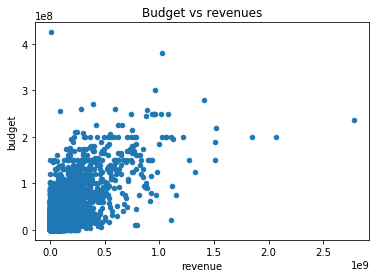

In [221]:
movies_df.plot(kind ="scatter" ,x = "revenue" , y = "budget") #plot scattermatrix for revenue and budget 
plt.title("Budget vs revenues") ; # set title for the graph

The scatter matrix give us more and more condfidence about our theory that budget play role in revenues , the scatter matrix shows crealy the relationship between the two of them , and give us more proof that higher budget movies is more likely to gain more revenues

#### From all above given high budget result in a way or another in  higher revenues rates


<a id='conclusions'></a>
## Conclusions

### After analysis and different visualizations we can say that although budget and popularity seems without any anlysis important factor to gain much more revenues but with our analysis we are very confident about that and we proved it by on way or another , so for all filmakers it is important to give high priority to popularity and also the movie's budget to get the most revenues



## <font color = "red"> Limitations

### 1- Many missing data values which cannot be numericaly be filled < for example filled by mean > <br>

### 2- Missing currency for columns like budget makes it harder to analyse data  <br>

### 3- Missing other key roles like writers in the dataset  <br>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [222]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0